# Figure 1

In [1]:
# Import packages.
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
# Print version numbers.
print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)
print('pandas', pd.__version__)
# Intialize my pandas preferences.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

matplotlib 3.5.2
numpy 1.22.3
pandas 1.4.2


In [2]:
# Define a function to find genes with any overlap of a region.
def genes_any_overlap(genes_df, start, end):
    # Intialize a set to store genes indicies.
    genes_idx = set()
    # For every row in the qc'ed genes.
    for _, row in genes_df.iterrows():
        # If this gene has any overlap with the region.
        if ((row['START'] <= start < row['STOP']) or         # g_s---s---g_e---e
            (row['START'] <= end < row['STOP']) or           # s---g_s---e---g_e
            (start >= row['START'] and end < row['STOP']) or # g_s---s---e---g_e
            (start <= row['START'] and end > row['STOP'])):  # s---g_s---g_e---e:
            # Update the set.
            genes_idx.add(row.name)
    return genes_df.iloc[np.sort(np.array(list(genes_idx))), :].reset_index(drop=True)

# Define a function to find tracts with any overlap of a region.
def tract_any_overlap(tracts_df, start, end):
    # Intialize a set to store tract indicies.
    tract_idx = set()
    # For every row in the qc'ed tracts.
    for _, row in tracts_df.iterrows():
        # If this tract has any overlap with the gene.
        if ((row['START'] <= start < row['END']) or         # t_s---s---t_e---e
            (row['START'] <= end < row['END']) or           # s---t_s---e---t_e
            (start >= row['START'] and end < row['END']) or # t_s---s---e---t_e
            (start <= row['START'] and end > row['END'])):  # s---t_s---t_e---e:
            # Update the set.
            tract_idx.add(row.name)
    return tracts_df.iloc[np.sort(np.array(list(tract_idx))), :].reset_index(drop=True)

In [3]:
# Load the datframes for figure 1.
chr12_genes_df = pd.read_csv('./data/ncbi_refseq_genes_chr12.csv.gz')
muc19_tracts_df = pd.read_csv('./data/tgp_muc19_tracts.csv.gz')
u30_df = pd.read_csv('./data/u30_per_gene.csv.gz')
pbs_df = pd.read_csv('./data/mxl_pbs_focal_742kb_region.csv.gz')

In [4]:
# Intialize dictionaries.
u30_genes = {}
u30_masks = {}
# Generate the muc19 mask.
muc19_u30_mask = u30_df['GENE_ID'].values == 'MUC19'
# For every population.
for pop in [
    'MXL', 'PEL', 'CLM', 'PUR', # AMR.
    'BEB', 'STU', 'ITU', 'PJL', 'GIH', # SAS.
    'CHB', 'KHV', 'CHS', 'JPT', 'CDX', # EAS.    
    'TSI', 'CEU', 'IBS', 'GBR', 'FIN', # EUR.
]:
    # Intialize the subdictionary.
    u30_genes[pop] = {}
    # Extract the background distribution and the observed value for muc19.
    dist = u30_df[f'{pop}'].values[~muc19_u30_mask]
    obs = u30_df[f'{pop}'].values[muc19_u30_mask][0]
    # Update the dictionaries
    u30_genes[pop]['o'] = obs
    u30_genes[pop]['d'] = dist[~np.isnan(dist)]
    u30_masks[pop] = u30_df[f'{pop}'].values == np.nanmax((u30_df[f'{pop}'].values))

In [5]:
# For every population.
for pop in u30_masks:
    # Print the population and display the maximum u30 value.
    print(pop)
    display(u30_df[u30_masks[pop]])

MXL


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
11104,283,MUC19,NM_173600.2,12,40787196,40964559,119368,3625,1,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


PEL


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
12911,235,UNC13C,NM_001080534.3,15,54270638,54920803,440052,13305,1,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CLM


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
6280,591,EYS,NM_001142800.2,6,64429876,66417119,1257580,34795,1,0.0,38.0,51.0,51.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,51.0,51.0,51.0,51.0,51.0


PUR


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
6280,591,EYS,NM_001142800.2,6,64429876,66417119,1257580,34795,1,0.0,38.0,51.0,51.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,51.0,51.0,51.0,51.0,51.0


BEB


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
9489,623,SEC23IP,NM_007190.4,10,121652242,121704169,31370,857,1,0.0,0.0,0.0,0.0,36.0,0.0,36.0,36.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


STU


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
4917,69,CDH10,NM_006727.5,5,24487209,24645087,117616,3266,1,23.0,0.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0


ITU


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
9489,623,SEC23IP,NM_007190.4,10,121652242,121704169,31370,857,1,0.0,0.0,0.0,0.0,36.0,0.0,36.0,36.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


PJL


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
9489,623,SEC23IP,NM_007190.4,10,121652242,121704169,31370,857,1,0.0,0.0,0.0,0.0,36.0,0.0,36.0,36.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


GIH


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
9489,623,SEC23IP,NM_007190.4,10,121652242,121704169,31370,857,1,0.0,0.0,0.0,0.0,36.0,0.0,36.0,36.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CHB


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
12079,273,NALF1,NM_001080396.3,13,107815858,108519844,514144,14578,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,16.0,24.0,22.0,16.0,0.0,0.0,0.0,0.0,0.0


KHV


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
14001,802,FANCA,NM_000135.4,16,89803957,89883055,36628,1717,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,1.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0


CHS


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
12079,273,NALF1,NM_001080396.3,13,107815858,108519844,514144,14578,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,16.0,24.0,22.0,16.0,0.0,0.0,0.0,0.0,0.0


JPT


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
4917,69,CDH10,NM_006727.5,5,24487209,24645087,117616,3266,1,23.0,0.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0


CDX


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
14001,802,FANCA,NM_000135.4,16,89803957,89883055,36628,1717,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,1.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0


TSI


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
11075,254,CCDC91,NM_018318.5,12,28343389,28703099,232438,5538,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,47.0,0.0,0.0,103.0


CEU


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
6280,591,EYS,NM_001142800.2,6,64429876,66417119,1257580,34795,1,0.0,38.0,51.0,51.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,51.0,51.0,51.0,51.0,51.0


IBS


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
6280,591,EYS,NM_001142800.2,6,64429876,66417119,1257580,34795,1,0.0,38.0,51.0,51.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,51.0,51.0,51.0,51.0,51.0


GBR


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
6280,591,EYS,NM_001142800.2,6,64429876,66417119,1257580,34795,1,0.0,38.0,51.0,51.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,51.0,51.0,51.0,51.0,51.0


FIN


,IDX,GENE_ID,TRANSCRIPT_ID,CHR,START,STOP,DEN,S,QC,MXL,PEL,CLM,PUR,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN
11075,254,CCDC91,NM_018318.5,12,28343389,28703099,232438,5538,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,47.0,0.0,0.0,103.0


In [6]:
# Convert the pbs dataframe to a dictionary.
pbs_info = {col: pbs_df[col].values for col in pbs_df.columns.values}

In [7]:
# Show the longest introgressed tract in mxl.
muc19_tracts_df[muc19_tracts_df['POP'] == 'MXL'].head(1)

,IND,SUPERPOP,POP,START,END,LENGTH
5,NA19725-hap2,AMR,MXL,40272001,41014001,742000


In [8]:
# Show the genes that overlap the longest introgressed tract in mxl.
pbs_genes_df = genes_any_overlap(chr12_genes_df, 40272001, 41014000)
pbs_genes_df

,GENE_ID,TRANSCRIPT_ID,START,STOP
0,SLC2A13,NM_052885.4,40148827,40499883
1,LRRK2,NM_198578.4,40618799,40763087
2,MUC19,NM_173600.2,40787196,40964559


In [9]:
# Subset the tracts for the pbs populations.
pbs_pops_muc19_tracts_df = muc19_tracts_df[
    np.isin(muc19_tracts_df['POP'].values, ['MXL', 'CHB', 'CEU'])
].reset_index(drop=True)
# Subset the pbs tracts before lrrk2.
before_lrrk2_df = tract_any_overlap(pbs_pops_muc19_tracts_df, 40272001, 40618799)
# Subset the pbs tracts after lrrk2.
after_lrrk2_df = tract_any_overlap(pbs_pops_muc19_tracts_df, 40618799, 41014000)
# Subset all pbs tracts.
pbs_tracts_df = tract_any_overlap(pbs_pops_muc19_tracts_df, 40272001, 41014000)
# Subset the introgresed tracts per pbs population.
mxl_pbs_tracts_df = pbs_tracts_df[pbs_tracts_df['POP'] == 'MXL'].sort_values(by=['LENGTH'], ignore_index=True)
chb_pbs_tracts_df = pbs_tracts_df[pbs_tracts_df['POP'] == 'CHB'].sort_values(by=['LENGTH'], ignore_index=True)
ceu_pbs_tracts_df = pbs_tracts_df[pbs_tracts_df['POP'] == 'CEU'].sort_values(by=['LENGTH'], ignore_index=True)

In [10]:
# Show the total tract counts for the focal 742kb region.
pbs_tracts_df.groupby(by=['SUPERPOP', 'POP'])[['IND']].count()

,,IND
SUPERPOP,POP,
AMR,MXL,39
EAS,CHB,11
EUR,CEU,3


In [11]:
# Show the tract counts before lrrk2.
before_lrrk2_df.groupby(by=['SUPERPOP', 'POP'])[['IND']].count()

,,IND
SUPERPOP,POP,
AMR,MXL,38
EAS,CHB,4
EUR,CEU,3


In [12]:
# Show the tract counts after lrrk2.
after_lrrk2_df.groupby(by=['SUPERPOP', 'POP'])[['IND']].count()

,,IND
SUPERPOP,POP,
AMR,MXL,39
EAS,CHB,11
EUR,CEU,3


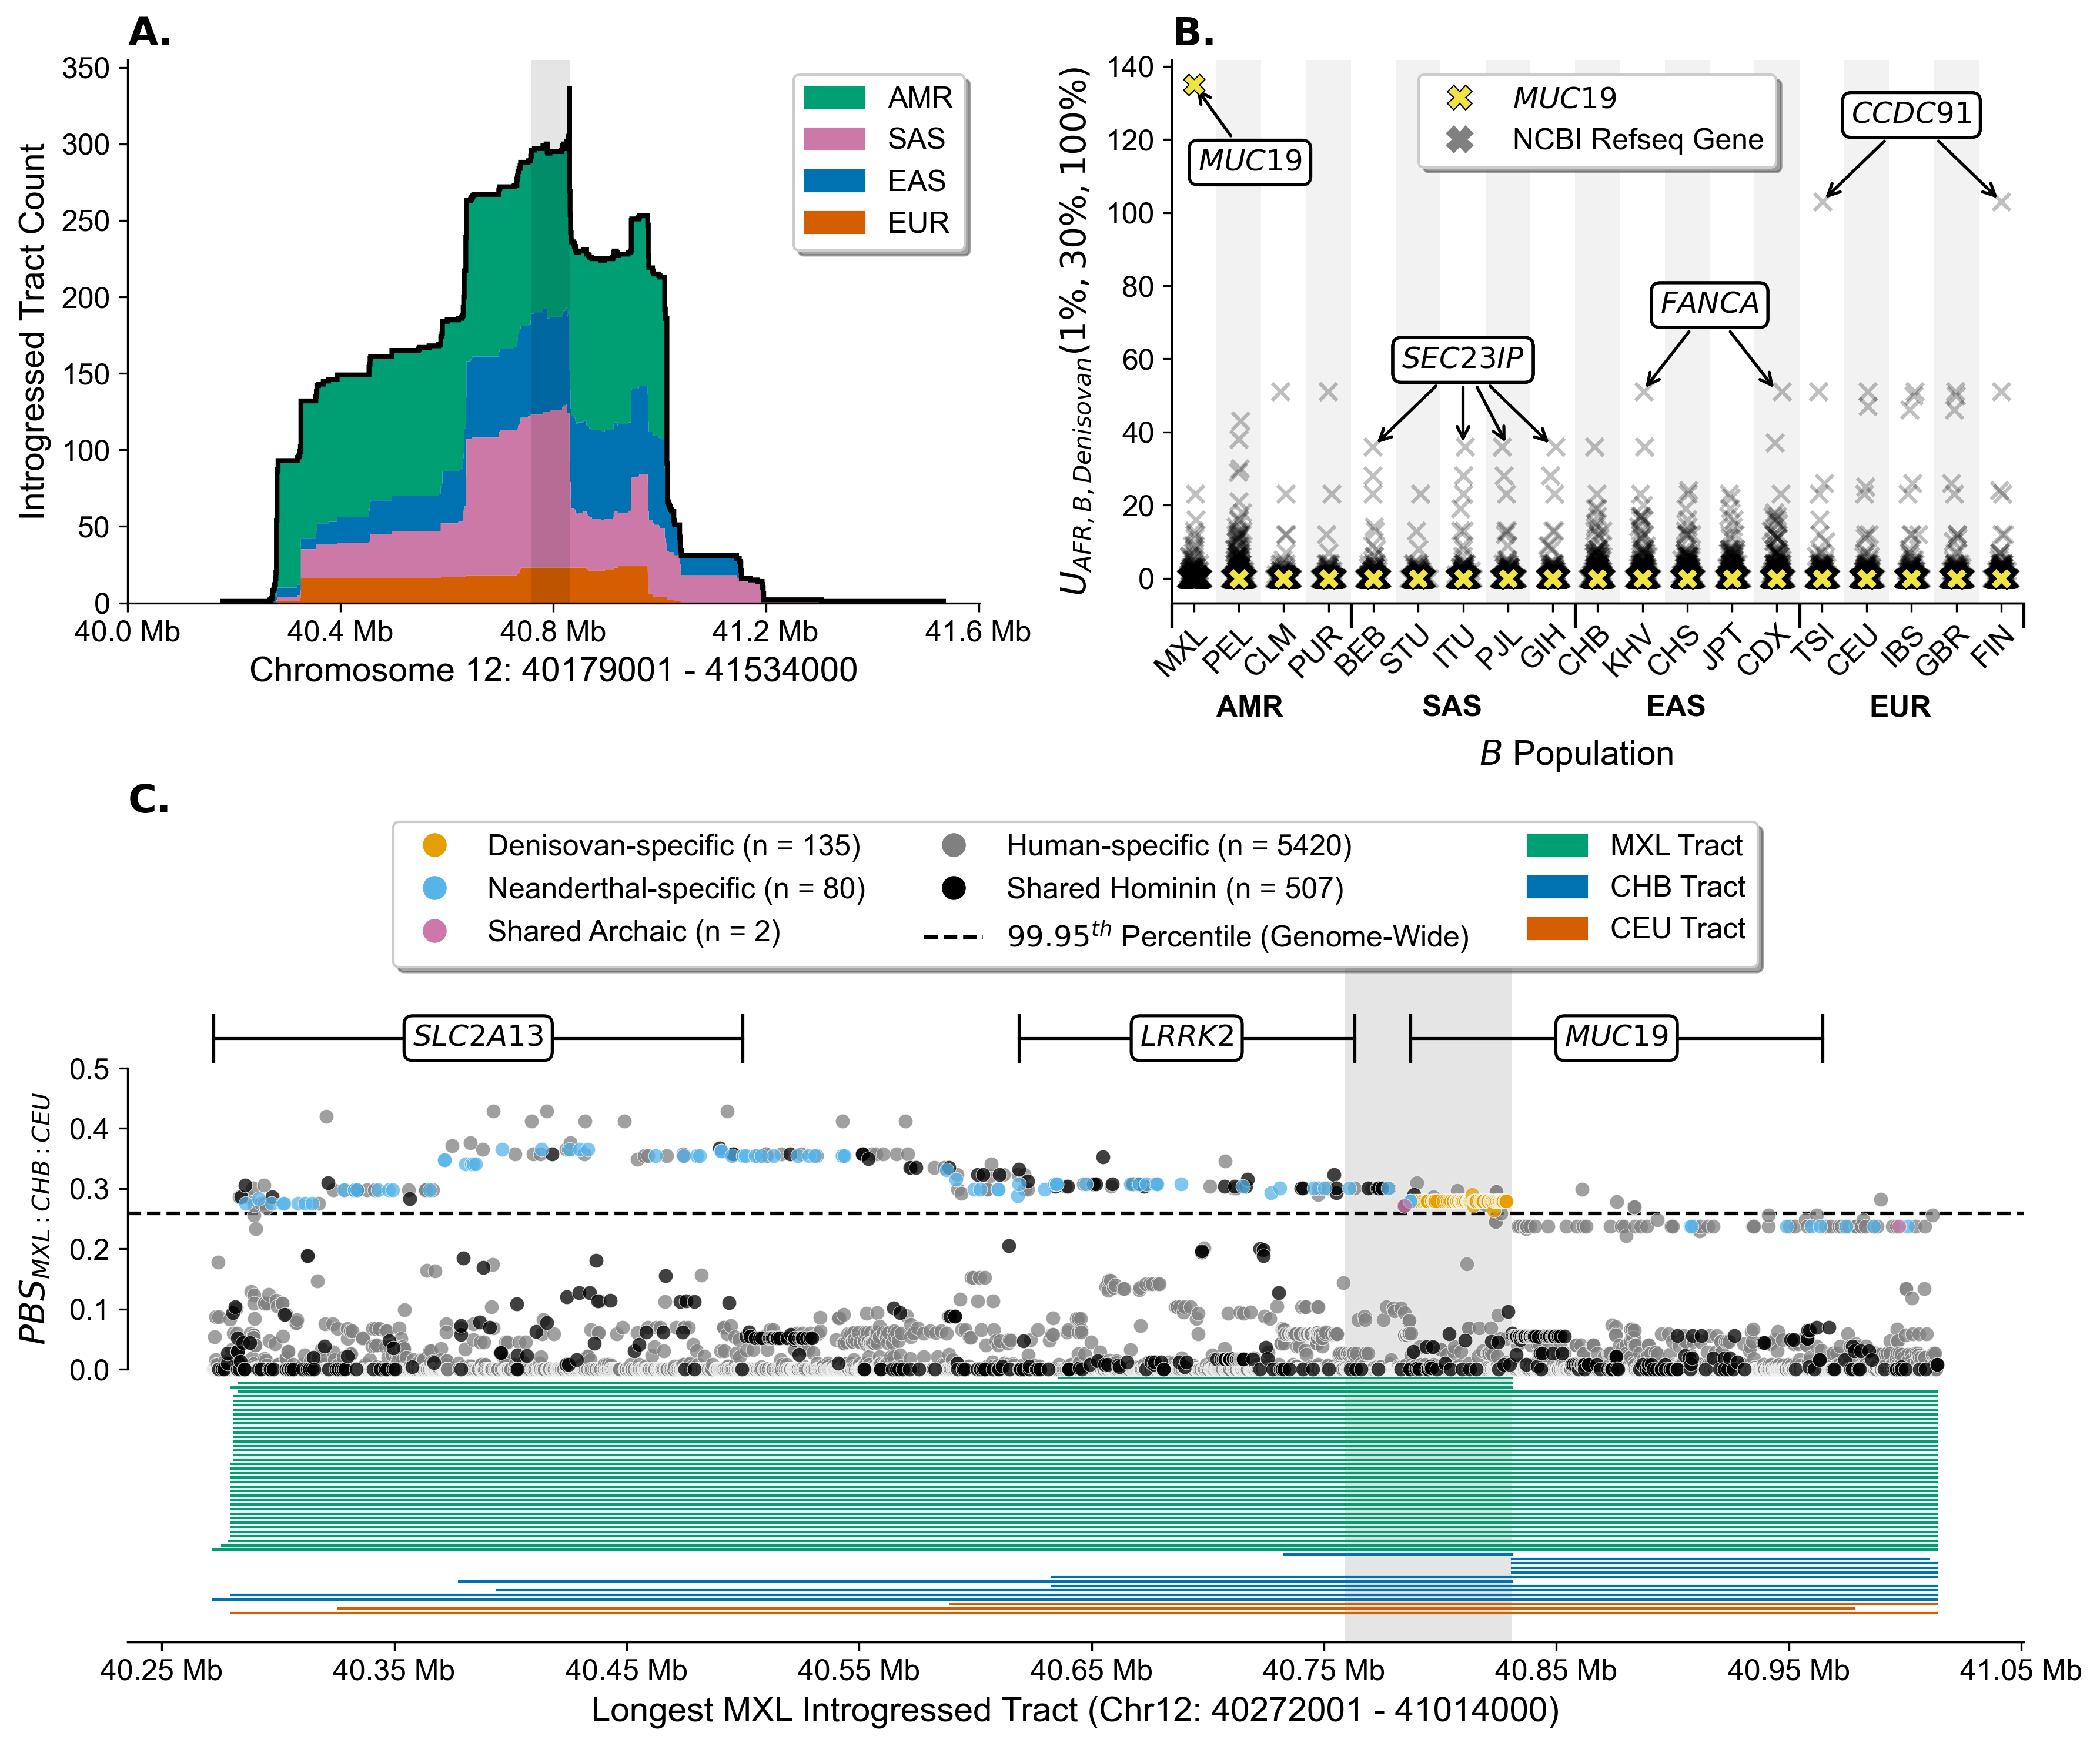

In [13]:
# Intialize the matplolib styling.
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
})
# Intialize the figure.
fig = plt.figure(
    figsize=(12, 10), dpi=300,
    facecolor='white',
)
# Intialize the grid.
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.5])
# Intialize the axes.
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, :])



###############
### Panel A ###
###############

# Intialize the distribution data for the tgp.
tgp_spops = muc19_tracts_df['SUPERPOP'].values
tgp_min, tgp_max = muc19_tracts_df['START'].min(), muc19_tracts_df['END'].max()
tgp_bins = np.arange(tgp_min, tgp_max+1)
tgp_tract_counts = np.zeros(tgp_bins.size)
tgp_counts = {
    'EUR': np.zeros(tgp_bins.size),
    'SAS': np.zeros(tgp_bins.size),
    'EAS': np.zeros(tgp_bins.size),
    'AMR': np.zeros(tgp_bins.size),
}
# For every superpopulation.
for spop in tgp_counts:
    # Determine the superpopulation mask.
    spop_df_mask = np.in1d(tgp_spops, [spop])
    # Subset the dataframe.
    spop_muc19_tracts_df = muc19_tracts_df[spop_df_mask].reset_index(drop=True)
    # Extract all the introgressed tracts.
    spop_starts = spop_muc19_tracts_df['START'].values
    spop_ends = spop_muc19_tracts_df['END'].values
    # Iterate through each interval.
    for start, end in zip(spop_starts, spop_ends):
        # Update the positions counts.
        tgp_counts[spop][start-tgp_min:end-tgp_min+1] += 1
        tgp_tract_counts[start-tgp_min:end-tgp_min+1] += 1
# Intialize dictionaries for plotting.
tract_colors = {
    'AMR': '#009E73', 'SAS': '#CC79A7', 'EAS': '#0072B2', 'EUR': '#D55E00',
}
# Intialize the plotting information.
panel_a_dicc = {
    'bins': np.arange(tgp_bins.min(), tgp_bins.max()+1.5),
    'pos': [tgp_bins.astype(int), tgp_bins.astype(int), tgp_bins.astype(int), tgp_bins.astype(int)],
    'weights': [tgp_counts[spop].astype(int) for spop in tgp_counts],
    'colors': [tract_colors[spop] for spop in tgp_counts],
    'legend': [Patch(color=tract_colors[spop], label=f'{spop}') for spop in tract_colors], 
}
# Plot the 72kb focal region.
ax1.axvspan(40759001, 40831000, alpha=0.1, facecolor='black', zorder=5)
# Plot the distribution.
ax1.hist(
    panel_a_dicc['pos'], bins=panel_a_dicc['bins'], weights=panel_a_dicc['weights'],
    histtype='stepfilled', color=panel_a_dicc['colors'], stacked=True,
)
ax1.hist(
    tgp_bins.astype(int), bins=panel_a_dicc['bins'],
    weights=tgp_tract_counts.astype(int), histtype='step', color='black', linewidth=2,
)

# Add axes labels.
ax1.set_ylabel('Introgressed Tract Count')
ax1.set_xlabel(f'Chromosome 12: {int(tgp_min)} - {int(tgp_max - 1)}')
# Rescale x-axis to Mb.
x_ticks = np.arange(40_000_000, 41_800_000, 400_000)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels([f'{round(x_tick / 1e6, 3)} Mb' for x_tick in x_ticks])
# Add a figure lgend.
ax1.legend(
    handles=panel_a_dicc['legend'],
    loc='upper right', bbox_to_anchor=(1, 1),
    frameon=True, fancybox=True, shadow=True,
)



###############
### Panel B ###
###############

# Generate the x-axis labels.
u30_xlabs = np.array([
    'MXL', 'PEL', 'CLM', 'PUR', # AMR.
    'BEB', 'STU', 'ITU', 'PJL', 'GIH', # SAS.
    'CHB', 'KHV', 'CHS', 'JPT', 'CDX', # EAS.    
    'TSI', 'CEU', 'IBS', 'GBR', 'FIN', # EUR.
])
# Generate the label positions.
u30_xlab_pos = np.arange(u30_xlabs.size)
# For every other x-axis label.
for loc in np.arange(1, u30_xlabs.size, 2):
    # Plot the alternating background.
    ax2.axvspan(loc-0.5, loc+0.5, facecolor='black', alpha=0.05)
# Intialize a list to store the observed values.
u30_obs = []
# For every population.
for i, pop in enumerate(u30_xlabs):
    # Add some jitter to the x-axis.
    pop_xvals = np.random.normal(u30_xlab_pos[i], 0.05, u30_genes[pop]['d'].size)
    # Append the observation list.
    u30_obs.append(u30_genes[pop]['o'])
    # Plot the background distribution.
    ax2.scatter(
        pop_xvals, u30_genes[pop]['d'],
        marker='x', color='#000000',
        s=50, zorder=5, alpha=0.25,
    )
# Plot the observed values.
ax2.scatter(
    u30_xlab_pos, u30_obs,
    marker='X', facecolor='#F0E442',
    edgecolor='#000000', linewidth=0.5,
    s=75, zorder=5,
)
# Annotate muc19 in mxl.
ax2.annotate(
    r'$MUC19$',
    xy=(u30_xlab_pos[0], 135),
    xytext=(u30_xlab_pos[1] + 0.25, 135 - 25),
    arrowprops=dict(arrowstyle='->', lw=1.25),
    ha='center', va='bottom', fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1.25),
)
# Annotate ccdc91 in tsi and fin.
ax2.annotate(
    r'$CCDC91$',
    xy=(u30_xlab_pos[-1], 103),
    xytext=(u30_xlab_pos[-3], 103 + 20),
    arrowprops=dict(arrowstyle='->', lw=1.25),
    ha='center', va='bottom', fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1.25),
)
ax2.annotate(
    r'$CCDC91$',
    xy=(u30_xlab_pos[-5], 103),
    xytext=(u30_xlab_pos[-3],103 + 20),
    arrowprops=dict(arrowstyle='->', lw=1.25),
    ha='center', va='bottom', fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1.25),
)
# Annotate fanca in khv and and cdx.
ax2.annotate(
    r'$FANCA$',
    xy=(u30_xlab_pos[-9], 51),
    xytext=(u30_xlab_pos[-8] + 0.5, 51 + 20),
    arrowprops=dict(arrowstyle='->', lw=1.25),
    ha='center', va='bottom', fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1.25),
)
ax2.annotate(
    r'$FANCA$',
    xy=(u30_xlab_pos[-6], 51),
    xytext=(u30_xlab_pos[-8] + 0.5, 51 + 20),
    arrowprops=dict(arrowstyle='->', lw=1.25),
    ha='center', va='bottom', fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1.25),
)
# Annotate sec23ip in beb, itu, pjl, and gih.
ax2.annotate(
    r'$SEC23IP$',
    xy=(u30_xlab_pos[4], 36),
    xytext=(u30_xlab_pos[6], 36 + 20),
    arrowprops=dict(arrowstyle='->', lw=1.25),
    ha='center', va='bottom', fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1.25),
)
ax2.annotate(
    r'$SEC23IP$', 
    xy=(u30_xlab_pos[6], 36),
    xytext=(u30_xlab_pos[6], 36 + 20),
    arrowprops=dict(arrowstyle='->', lw=1.25),
    ha='center', va='bottom', fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1.25),
)
ax2.annotate(
    r'$SEC23IP$',
    xy=(u30_xlab_pos[7], 36),
    xytext=(u30_xlab_pos[6], 36 + 20),
    arrowprops=dict(arrowstyle='->', lw=1.25),
    ha='center', va='bottom', fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1.25),
)
ax2.annotate(
    r'$SEC23IP$',
    xy=(u30_xlab_pos[8], 36),
    xytext=(u30_xlab_pos[6], 36 + 20),
    arrowprops=dict(arrowstyle='->', lw=1.25),
    ha='center', va='bottom', fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1.25),
)
# Label the axes.
ax2.set_ylabel(r'$U_{AFR, B, Denisovan}(1\%, 30\%, 100\%)$')
ax2.set_xlabel(r'$B$ Population')
ax2.xaxis.set_label_coords(0.475, -0.25)
# Set the x-axis limits, tick positions, and labels.
ax2.set_xlim(-0.5, u30_xlabs.size - 0.5)
ax2.set_xticks(u30_xlab_pos)
ax2.set_xticklabels(
    u30_xlabs, rotation=45,
    ha='right', rotation_mode='anchor',
)
# Add secondary x-axes for grouping by super population.
sec_xaxis_1 = ax2.secondary_xaxis('bottom')
sec_xaxis_2 = ax2.secondary_xaxis('bottom')
# Group the populations by super populations.
sec_xaxis_1.set_xticks([1.25, 5.75, 10.75, 15.75])
sec_xaxis_1.set_xticklabels(['\nAMR', '\nSAS', '\nEAS', '\nEUR'], fontweight='bold')
sec_xaxis_1.tick_params(length=0)
sec_xaxis_1.xaxis.set_tick_params(pad=25)
# Plot dividers to seperate the super population groups.
sec_xaxis_2.set_xticks([-0.5, 3.5, 8.5, 13.5, 18.5])
sec_xaxis_2.set_xticklabels([])
sec_xaxis_2.tick_params(length=10, width=1.25)
# Add a legend.
ax2.legend(
    handles=[
        Line2D([0], [0], linestyle='none', marker='X', markersize=10, markeredgewidth=0.5, color='#F0E442', markeredgecolor='black', label=r'$MUC19$'),
        Line2D([0], [0], linestyle='none', marker='X', markersize=10, color='grey', label='NCBI Refseq Gene'),
    ],
    loc='upper center', bbox_to_anchor=(0.5, 1),
    frameon=True, fancybox=True, shadow=True,
)



###############
### Panel C ###
###############

# Intialize a dictionary of snp partitions.
snp_dicc = {
    'IS_HUM': {'l': 'Human-specific', 'c': 'gray'},
    'IS_HOM': {'l': 'Shared Hominin', 'c': '#000000'},
    'IS_DEN': {'l': 'Denisovan-specific', 'c': '#E69F00'},
    'IS_NEA': {'l': 'Neanderthal-specific', 'c': '#56B4E9'},
    'IS_SHR': {'l': 'Shared Archaic', 'c': '#CC79A7'},
}
# Intialize the gene information.
gene_dicc = {
    gene_id: [pbs_genes_df['START'].values[i], pbs_genes_df['STOP'].values[i]] 
    for i, gene_id in enumerate(pbs_genes_df['GENE_ID'].values)
}
# Plot the 72kb focal region.
ax3.axvspan(40759001, 40831000, alpha=0.1, facecolor='black')
# For all snp types.
for snp_type in snp_dicc:
    # Plot the per-snp pbs values.
    ax3.scatter(
        pbs_info['POS'][pbs_info[snp_type]], pbs_info['PBS'][pbs_info[snp_type]], zorder=5,
        color=snp_dicc[snp_type]['c'], marker='o', edgecolor='white', linewidth=0.25, alpha=0.75, s=35,
    )
# Plot the outlier threshold.
ax3.axhline(np.unique(pbs_info['OUT_THRESH'])[0], 0, 1, color='black', linestyle='dashed', lw=1.5)
# For every gene.
for gene in gene_dicc:
    # Plot the gene segments within the region.
    ax3.plot(
        [max(gene_dicc[gene][0], pbs_info['POS'][0]), min(gene_dicc[gene][1], pbs_info['POS'][-1])],
        [0.55, 0.55], color='black', marker='|', ms=20, markeredgewidth=1.25, lw=1.25, zorder=5,
    )
    # Annotate the gene.
    ax3.text(
        ((max(gene_dicc[gene][0], pbs_info['POS'][0]) + min(gene_dicc[gene][1], pbs_info['POS'][-1])) / 2), 0.55,
        fr'${gene}$', fontsize=12, horizontalalignment='center',verticalalignment='center',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black', lw=1.25), zorder=5,
    )
# Intialize a counter.
c_tract = 2
# For every mxl introgressed tract.
for _, row in mxl_pbs_tracts_df.iterrows():
    # Plot the tract.
    ax3.plot(
        [max(row['START'], pbs_info['POS'][0]), min(row['END'], pbs_info['POS'][-1])],
        [c_tract * -0.0075, c_tract * -0.0075], color=tract_colors[row['SUPERPOP']], lw=1,
    )
    # Increment the counter.
    c_tract += 1
# For every chb introgressed tract.
for _, row in chb_pbs_tracts_df.iterrows():
    # Plot the tract.
    ax3.plot(
        [max(row['START'], pbs_info['POS'][0]), min(row['END'], pbs_info['POS'][-1])],
        [c_tract * -0.0075, c_tract * -0.0075], color=tract_colors[row['SUPERPOP']], lw=1,
    )
    # Increment the counter.
    c_tract += 1
# For every ceu introgressed tract.
for _, row in ceu_pbs_tracts_df.iterrows():
    # Plot the tract.
    ax3.plot(
        [max(row['START'], pbs_info['POS'][0]), min(row['END'], pbs_info['POS'][-1])],
        [c_tract * -0.0075, c_tract * -0.0075], color=tract_colors[row['SUPERPOP']], lw=1,
    )
    # Increment the counter.
    c_tract += 1
# Make a secondary axis.
ax3_1 = ax3.twinx()
# Sync the y-axes.
ax3.set_yticks(np.arange(0, 0.6, 0.1))
ax3.spines['left'].set_bounds(0, ax3.get_yticks()[-1])
ax3_1.set_yticks(np.arange(0, 0.6, 0.1))
ax3_1.spines['left'].set_visible(False)
ax3_1.tick_params(axis='y', which='both', right=False, labelright=False)
# Set the axes limits.
ax3.set_ylim(top=0.9)
# Rescale x-axis to Mb.
x_ticks = np.arange(40_250_000, 41_100_000, 100_000)
ax3.set_xticks(x_ticks)
ax3.set_xticklabels([f'{round(x_tick / 1e6, 3)} Mb' for x_tick in x_ticks])
# Label the axes.
ax3.set_ylabel(r'$PBS_{MXL:CHB:CEU}$')
ylab_pos = ax3.get_yticks()[-1] / 2
ax3.yaxis.set_label_coords(-0.04, ylab_pos, transform=ax3.get_yaxis_transform())
ax3.set_xlabel('Longest MXL Introgressed Tract (Chr12: 40272001 - 41014000)')    
# Intialize the legend handles.
legend_handles = [
    Line2D(
        [0], [0], linestyle='none', marker='o', markersize=10, markeredgewidth=0.25,
        color=snp_dicc[snp_type]['c'], markeredgecolor='white', label=f'{snp_dicc[snp_type]["l"]} (n = {pbs_info[snp_type].sum()})'
    ) for snp_type in ['IS_DEN', 'IS_NEA', 'IS_SHR', 'IS_HUM', 'IS_HOM']
]
legend_handles.extend([
    Line2D([0], [0], color='black', linestyle='dashed', label=r'$99.95^{th}$ Percentile (Genome-Wide)'),
    Patch(color='#009E73', label='MXL Tract'), Patch(color='#0072B2', label='CHB Tract'), Patch(color='#D55E00', label='CEU Tract'),
])
# Add a legend.
ax3.legend(
    handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.025),
    ncol=3, frameon=True, fancybox=True, shadow=True,
)



#################
### Exporting ###
#################

# Intilaize a title list.
title_list = [
    r'$\bf{A.}$',
    r'$\bf{B.}$',
    r'$\bf{C.}$',
]
# For each subplot.
for ax, title in zip([ax1, ax2, ax3], title_list):
    # Plot the title.
    ax.set_title(title, loc='left')
# Enforce a tight layout.
plt.tight_layout()
# Export the plot.
plt.savefig(
    './main_figures/png/figure_1.png', format='png',
    facecolor='white', bbox_inches='tight', dpi=500,
)
plt.savefig(
    './main_figures/svg/figure_1.svg', format='svg',
    facecolor='white', bbox_inches='tight', dpi=500,
)
plt.savefig(
    './main_figures/pdf/figure_1.pdf', format='pdf',
    facecolor='white', bbox_inches='tight', dpi=500,
)
# Show the plot.
plt.show()